# 2023-08-28 6 - Results Multimodel Statinformed.ipynb
Results of fitting constrained models with $\epsilon$ based on the quartiles of ERM error aka statinformed models.(the 5-epoch ones, see notebook 5).

## Fetching runs

In [58]:
import wandb
from math import isnan 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import wandb
from tqdm import tqdm
# from cycler import cycler
import matplotlib as mpl
from IPython.display import Markdown, display
    
api = wandb.Api()
project = "Autoformer"
workspace = "alelab"

sweeps = [
    # Constrained sweeps
    "fp5rn5h0",
    "8kexcoui",
    "1az5bvhg",
    "viiqubln",
    # ERM baseline
    "fi1lnhc1",
]

runs = api.runs(f"{workspace}/{project}")
all_runs = []
for run in tqdm(runs):
    if run.State=="finished":
        #for split in ["train", "test","val"]:
        for split in ["train", "test"]:
            for metric in ["mse",]:
            #for metric in ["loss",]: #had to change in this plot because I messed up. The 'loss' name is incorrect (it's not the lagrange-added loss.)
                pred_len = run.config["pred_len"]
                metrics = np.zeros(pred_len)
                #if run.sweep.id in ["tkol4t1r","c7xaz5e8"]:
                if run.sweep.id in sweeps:
                    for i in range(pred_len):
                        run_dict = {**run.config}
                        #run_dict["constraint_level"] = constraint_level
                        run_dict[f"{metric}"] = run.summary[f"{metric}/{split}/{i}"]
                        #run_dict[f"{metric}"] = run.summary.get(f"{metric}/{split}/{i}",run.summary.get(f"mse/{split}/{i}",np.nan)) #god forgive me for this line
                        run_dict["step"]=i
                        run_dict["epoch"]=run.summary["epoch"]
                        run_dict["infeasible_rate"]=run.summary[f"infeasible_rate/{split}"]
                        run_dict["split"] = split
                        run_dict["run_id"] = run.id
                        # Get either Constrained/ or ERM/ from the run name, then append model name.
                        #print("run.name", run.name)
                        #debug if ERM run
                        run_dict["Algorithm"] = f"{run.name.split('/')[0]} {run.config['model']}"
                        run_dict["sweep_id"] = run.sweep.id
                        #print("Algorithm", run_dict["Algorithm"])
                        all_runs.append(run_dict)

df = pd.DataFrame(all_runs)

100%|██████████| 268/268 [00:18<00:00, 14.45it/s]


In [50]:
df[['run_id',"sweep_id",'Algorithm','model','constraint_level','pred_len','epoch']].drop_duplicates().sort_values(['sweep_id','model',"pred_len","constraint_level"])

,run_id,sweep_id,Algorithm,model,constraint_level,pred_len,epoch
8064,uaimpeup,1az5bvhg,StatInformed-10e Autoformer,Autoformer,0.682,336,8
6720,b48hec8w,1az5bvhg,StatInformed-10e Autoformer,Autoformer,0.741,336,4
5376,xm2kktah,1az5bvhg,StatInformed-10e Autoformer,Autoformer,0.970,336,10
7392,fe29o3il,1az5bvhg,StatInformed-10e Reformer,Reformer,0.682,336,10
6048,749ywu49,1az5bvhg,StatInformed-10e Reformer,Reformer,0.741,336,10
4704,chbkcq99,1az5bvhg,StatInformed-10e Reformer,Reformer,0.970,336,10
4320,6riqdfsi,8kexcoui,StatInformed-10e Autoformer,Autoformer,0.553,192,5
3552,4uwwn64k,8kexcoui,StatInformed-10e Autoformer,Autoformer,0.567,192,6
2784,tv51dihb,8kexcoui,StatInformed-10e Autoformer,Autoformer,0.665,192,10
3936,mitm69y2,8kexcoui,StatInformed-10e Reformer,Reformer,0.553,192,10


In [65]:
df[['mse']]

,mse
0,0.433165
1,0.388313
2,0.366020
3,0.359523
4,0.355823
...,...
17371,0.948934
17372,0.956651
17373,0.962851
17374,0.976771


## Plots

[-1.     0.556  0.553  0.516]


### Reformer pred_len: 96 constraint_level: 0.556

,pred_len,constraint_level,Algorithm,0
0,96,-1.000,StatInformed-ERM-10e Autoformer,192
1,96,0.556,StatInformed-10e Autoformer,192
2,96,0.556,StatInformed-10e Reformer,192


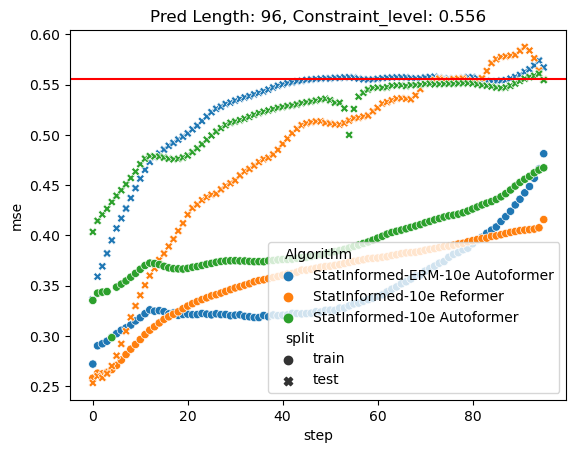

### Reformer pred_len: 96 constraint_level: 0.553

,pred_len,constraint_level,Algorithm,0
0,96,-1.000,StatInformed-ERM-10e Autoformer,192
1,96,0.553,StatInformed-10e Autoformer,192
2,96,0.553,StatInformed-10e Reformer,192


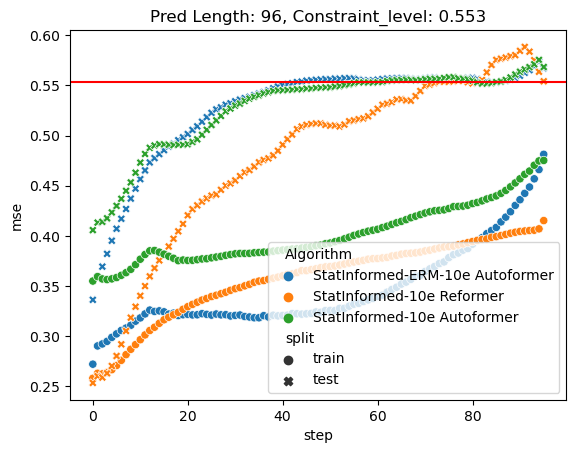

### Reformer pred_len: 96 constraint_level: 0.516

,pred_len,constraint_level,Algorithm,0
0,96,-1.000,StatInformed-ERM-10e Autoformer,192
1,96,0.516,StatInformed-10e Autoformer,192
2,96,0.516,StatInformed-10e Reformer,192


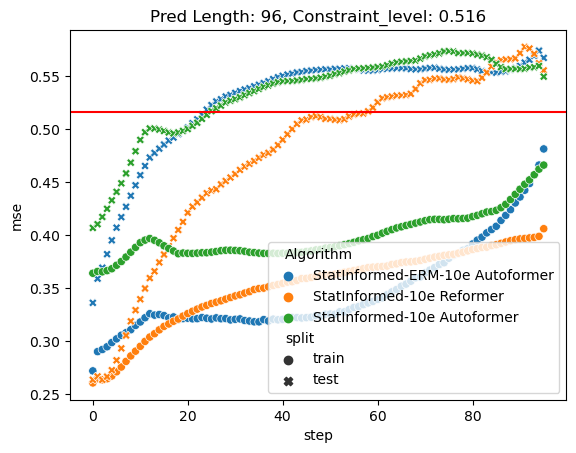

[-1.     0.665  0.567  0.553]


### Reformer pred_len: 192 constraint_level: 0.665

,pred_len,constraint_level,Algorithm,0
0,192,-1.000,StatInformed-ERM-10e Autoformer,384
1,192,0.665,StatInformed-10e Autoformer,384
2,192,0.665,StatInformed-10e Reformer,384


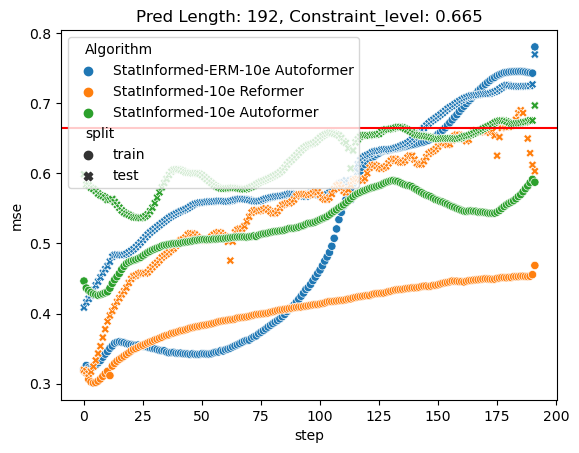

### Reformer pred_len: 192 constraint_level: 0.567

,pred_len,constraint_level,Algorithm,0
0,192,-1.000,StatInformed-ERM-10e Autoformer,384
1,192,0.567,StatInformed-10e Autoformer,384
2,192,0.567,StatInformed-10e Reformer,384


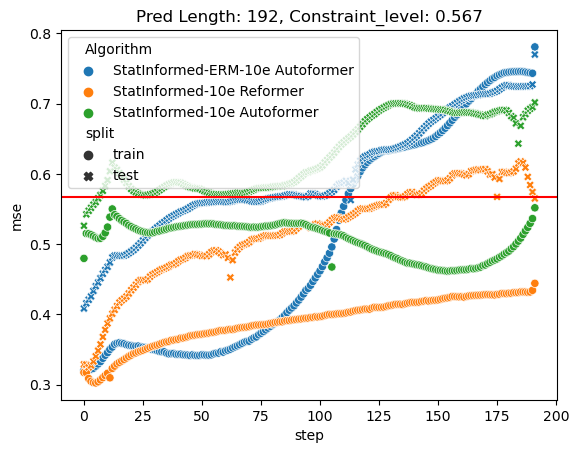

### Reformer pred_len: 192 constraint_level: 0.553

,pred_len,constraint_level,Algorithm,0
0,192,-1.000,StatInformed-ERM-10e Autoformer,384
1,192,0.553,StatInformed-10e Autoformer,384
2,192,0.553,StatInformed-10e Reformer,384


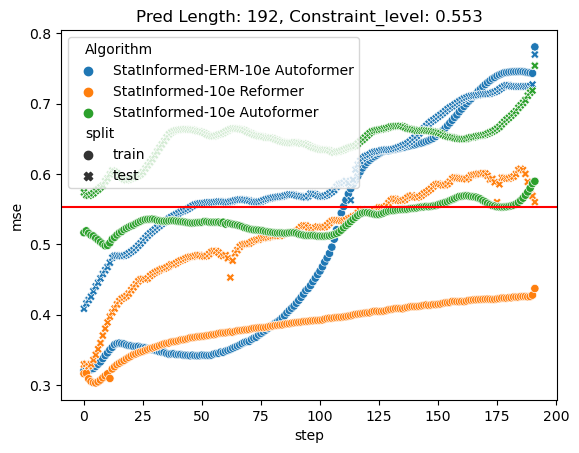

[-1.     0.97   0.741  0.682]


### Reformer pred_len: 336 constraint_level: 0.97

,pred_len,constraint_level,Algorithm,0
0,336,-1.00,StatInformed-ERM-10e Autoformer,672
1,336,0.97,StatInformed-10e Autoformer,672
2,336,0.97,StatInformed-10e Reformer,672


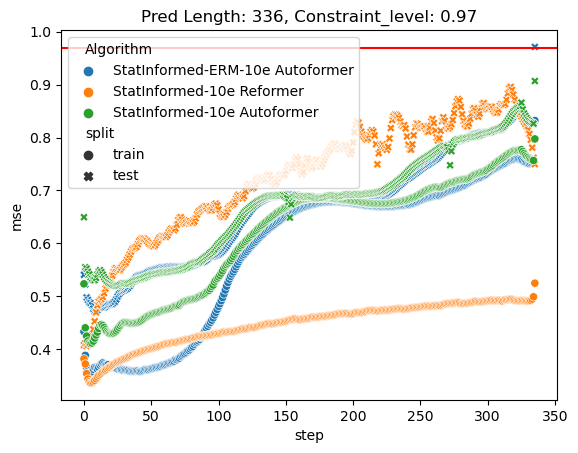

### Reformer pred_len: 336 constraint_level: 0.741

,pred_len,constraint_level,Algorithm,0
0,336,-1.000,StatInformed-ERM-10e Autoformer,672
1,336,0.741,StatInformed-10e Autoformer,672
2,336,0.741,StatInformed-10e Reformer,672


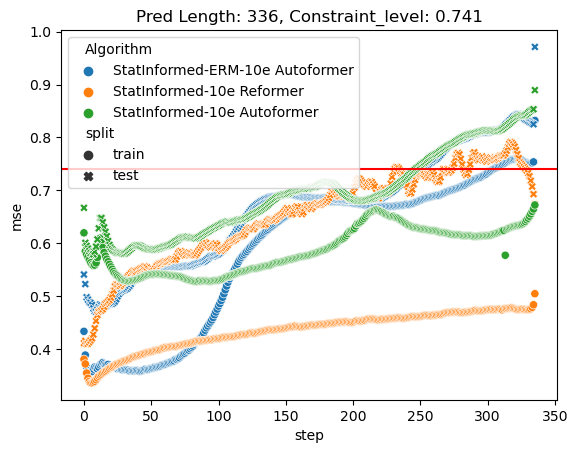

### Reformer pred_len: 336 constraint_level: 0.682

,pred_len,constraint_level,Algorithm,0
0,336,-1.000,StatInformed-ERM-10e Autoformer,672
1,336,0.682,StatInformed-10e Autoformer,672
2,336,0.682,StatInformed-10e Reformer,672


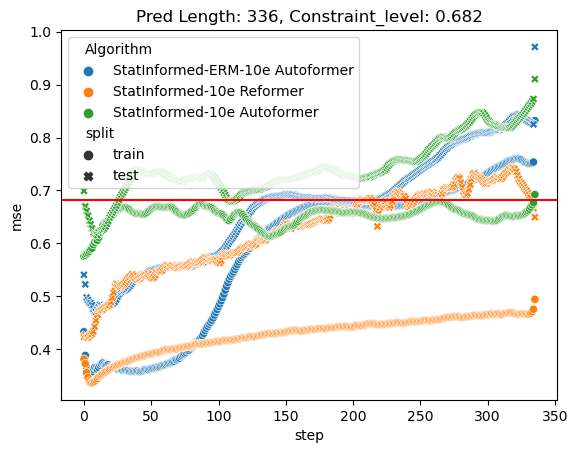

[0.912 0.862 0.698]


### Reformer pred_len: 720 constraint_level: 0.912

,pred_len,constraint_level,Algorithm,0
0,720,0.912,StatInformed-10e Autoformer,1440
1,720,0.912,StatInformed-10e Reformer,1440


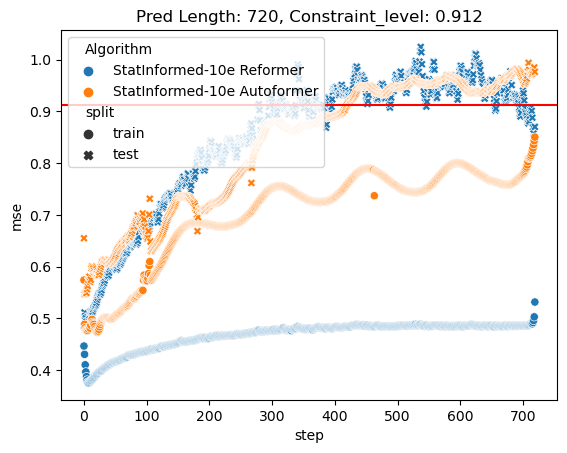

### Reformer pred_len: 720 constraint_level: 0.862

,pred_len,constraint_level,Algorithm,0
0,720,0.862,StatInformed-10e Autoformer,1440
1,720,0.862,StatInformed-10e Reformer,1440


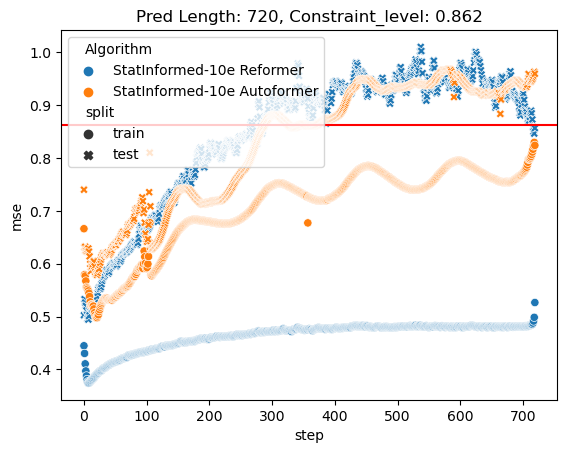

### Reformer pred_len: 720 constraint_level: 0.698

,pred_len,constraint_level,Algorithm,0
0,720,0.698,StatInformed-10e Autoformer,1440
1,720,0.698,StatInformed-10e Reformer,1440


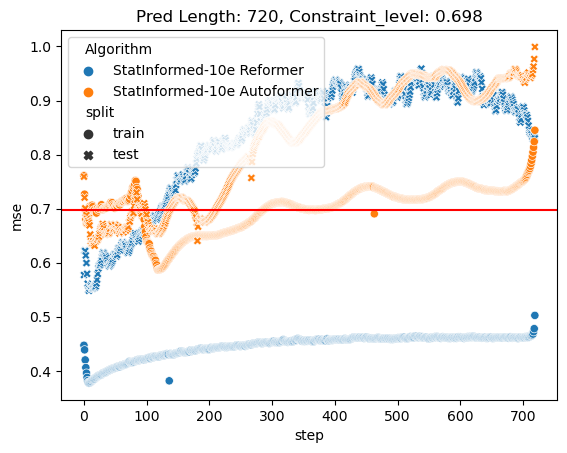

In [68]:
for (pred_len), series in df.groupby(["pred_len"]):
    constraints = series.constraint_level.unique()
    print(constraints)
    constraints = constraints[constraints!=-1] # to iterate over all constraints explored.
    for constraint_level in constraints:
        display(Markdown(f"### {model} pred_len: {pred_len} constraint_level: {constraint_level}"))
        plot_series = series[series["constraint_level"].isin([constraint_level,-1])] # The -1 adds the ERM baseline.

        display(plot_series.groupby(['pred_len','constraint_level','Algorithm']).size().reset_index())

        sns.scatterplot(x="step", y="mse", hue="Algorithm",style="split", data=plot_series)
        plt.axhline(y=constraint_level, color='r', linestyle='-')
        plt.title(f"Pred Length: {pred_len}, Constraint_level: {constraint_level}")
        plt.show()

## Is the early stopping impairing some models of satisfying constraints? 

In [59]:
df[['run_id',"sweep_id",'Algorithm','model','constraint_level','pred_len','epoch','infeasible_rate']].drop_duplicates() \
    .sort_values(['pred_len','epoch'], ascending=True)

,run_id,sweep_id,Algorithm,model,constraint_level,pred_len,epoch,infeasible_rate
1056,ne4liw91,fi1lnhc1,StatInformed-ERM-10e Autoformer,Autoformer,-1.000,96,4,1.000000
1824,63p7odjm,fp5rn5h0,StatInformed-10e Autoformer,Autoformer,0.553,96,4,0.187500
1920,63p7odjm,fp5rn5h0,StatInformed-10e Autoformer,Autoformer,0.553,96,4,0.171066
2208,4dvudbt2,fp5rn5h0,StatInformed-10e Autoformer,Autoformer,0.516,96,4,0.187500
2304,4dvudbt2,fp5rn5h0,StatInformed-10e Autoformer,Autoformer,0.516,96,4,0.243724
1440,387ytolz,fp5rn5h0,StatInformed-10e Autoformer,Autoformer,0.556,96,6,0.281250
1536,387ytolz,fp5rn5h0,StatInformed-10e Autoformer,Autoformer,0.556,96,6,0.150945
1248,p9izzn2r,fp5rn5h0,StatInformed-10e Reformer,Reformer,0.556,96,10,0.041667
1344,p9izzn2r,fp5rn5h0,StatInformed-10e Reformer,Reformer,0.556,96,10,0.142792
1632,b1adswkj,fp5rn5h0,StatInformed-10e Reformer,Reformer,0.553,96,10,0.041667
